# Multi & NN

# 1 Multi-class Classification

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat
# tells matplotlib to embed plots within the notebook

import seaborn as sns

%matplotlib inline

## 1.1 Dataset

In [2]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

#  training data stored in arrays X, y
mat = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = mat['X'], mat['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

m = y.size

In [3]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

## 1.2 Visualizing the data

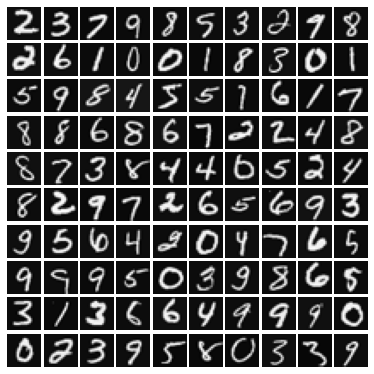

In [5]:

rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
indexes = np.random.choice(5000, rows*cols)
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(mat['X'][indexes[count]].reshape(20,20).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

## 1.3 Vectorizing Logistic Regression

   ### 1.3.1 Vectorizing Regularized Logistic Regression

In [6]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

In [7]:
def lr_cost_function(theta, X, y, lambda_reg):
    m = y.shape[0]
    theta = theta[:, np.newaxis] 
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h))) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X) + ((lambda_reg/m) * theta.T)
    grad[0, 0] = (1/m) * diff_hy.T.dot(X[:, 0])

    return J, grad

Testing Cost Function


In [8]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.hstack((np.ones((5,1)), (np.arange(1,16).reshape(3,5)).T / 10))
y_t = np.array([1, 0, 1, 0, 1]).reshape(5, -1)
lambda_t = 3

In [9]:
print(X_t)

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]


In [10]:
print(y_t)

[[1]
 [0]
 [1]
 [0]
 [1]]


In [11]:
J, grad = lr_cost_function(theta_t, X_t, y_t, lambda_t)
print('Cost:', J)
print('Expected cost: 2.534819')
print('Gradients:')
print(grad.T)
print('Expected gradients:')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003')

Cost: [[2.5348194]]
Expected cost: 2.534819
Gradients:
[[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


## 1.4 One-vs-all Classification
        In this part of the exercise, you will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the  classes in our dataset. In the handwritten digits dataset, k=10 , but your code should work for any value of K.

In [12]:
import scipy.optimize as opt
def one_vs_all(X, y, num_labels, lambda_reg):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n+1))    
    X = np.hstack((np.ones((m,1)), X))
    
    for i in range(num_labels):
        initial_theta = np.zeros(shape=(n+1))
        opt_results = opt.minimize(lr_cost_function, initial_theta, args=(X, y==i+1, lambda_reg), 
                                   method='TNC', jac=True, options={'maxiter':50})
        all_theta[i, :] = opt_results['x']
        
    return all_theta

### 1.4.1 One-vs-all Prediction

In [13]:
def predict_one_vs_all(all_theta, X):
    m, n = X.shape
    X = np.hstack((np.ones((m,1)),X))
    
    pred = sigmoid(X.dot(all_theta.T))
    y_pred = np.argmax(pred, axis=1)+1
    return y_pred

In [14]:
lambda_r = 0.1
num_labels = 10
all_theta = one_vs_all(mat['X'], mat['y'], num_labels, lambda_r)

In [15]:
y_pred = predict_one_vs_all(all_theta, mat['X'])
accuracy = np.mean(y_pred == mat['y'].T)
f'Train accuracy: {accuracy * 100}'

'Train accuracy: 85.32'

# 2. Neural Networks
        In this part of the exercise, you will implement a neural network to rec- ognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this week, you will be using parameters from a neural network that we have already trained. Your goal is to implement the feedforward propagation algorithm to use our weights for prediction. In next week’s ex- ercise, you will write the backpropagation algorithm for learning the neural network parameters.

In [16]:
#  training data stored in arrays X, y
data = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()

y[y == 10] = 0

# get number of examples in dataset
m = y.size



In [17]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

# Load the .mat file, which returns a dictionary 
weights = loadmat(os.path.join('Data', 'ex3weights.mat'))

# get the model weights from the dictionary
# Theta1 has size 25 x 401
# Theta2 has size 10 x 26
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

In [20]:
def predict(Theta1, Theta2, X):
   
    # Make sure the input has two dimensions
    if X.ndim == 1:
        X = X[None]  # promote to 2-dimensions
    
    # useful variables
    m = X.shape[0]
    print("m : ",m)
    num_labels = Theta2.shape[0]
    print("num_labels : ",num_labels)

    # You need to return the following variables correctly 
    p = np.zeros(X.shape[0])

    # ====================== YOUR CODE HERE ======================
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    a2 = sigmoid(X.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
    p = np.argmax(sigmoid(a2.dot(Theta2.T)), axis = 1)


    return p

In [21]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))

m :  5000
num_labels :  10
Training Set Accuracy: 97.5%
